In [3]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_1samp, norm, chi2

In [4]:
x1 = norm.rvs(size = 50)
print(x1)

[-2.63308013 -0.34625263 -1.72516444  1.42832338  0.023213   -0.71336007
  0.20011195 -0.18146079  0.4615126   1.94256575  0.97042959 -0.31653979
 -0.16622652 -0.97986996  0.43281437  0.85396417  0.12779967  1.1528307
 -1.46817876 -0.73994054  0.34951685 -0.68707373  1.53527733  1.81706415
  0.76650158  0.37308136  0.39680605 -0.38786317  1.04595525  1.22143774
  0.21031683 -1.28783674  0.113235    0.13549546 -0.39412356 -0.26010372
 -0.5645194   0.60294036 -0.1393387   0.66319378  1.90143633 -0.28911441
 -1.52059112  1.90645897 -0.04282384  0.42550913  0.6862757   0.10339967
  0.36975496 -1.09650127]


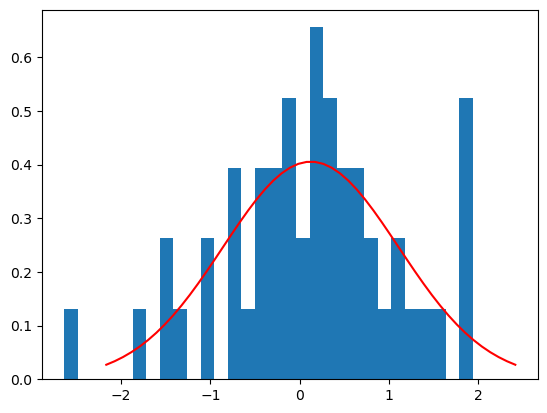

In [5]:
x_axis = np.linspace(norm.ppf(0.01, loc = np.mean(x1), scale = np.std(x1, ddof=1)),
                     norm.ppf(0.99, loc = np.mean(x1), scale = np.std(x1, ddof=1)))
plt.hist(x1, bins = 30, density=True)
plt.plot(x_axis, norm.pdf(x_axis, loc=np.mean(x1), scale=np.std(x1, ddof=1)), color='red')
plt.show()

In [6]:
def z_stat(x, popmean, alpha, alternative):
    n = len(x)
    z_value = (np.mean(x)-popmean)/(np.std(x, ddof=1)/np.sqrt(n))
    print('Test statistic :', z_value)
    
    if alternative =='two-sided':
        print('Reject H0') if np.abs(z_value)>norm.ppf(1-alpha/2) else print('Accept H0')
    elif alternative == 'less':
        print('Reject H0') if z_value<norm.ppf(alpha) else print('Accept H0')
    else:
        print('Reject H0') if z_value>norm.ppf(1-alpha) else print('Accept H0')
        
z_stat(x1, 0.5, 0.05, 'two-sided')

Test statistic : -2.690233679974063
Reject H0


In [7]:
small_x = np.random.choice(x1, 25, replace = True)
print(small_x)

[-0.26010372 -1.46817876 -0.68707373  0.10339967  1.90645897  0.6862757
  1.1528307   1.81706415  0.39680605 -0.73994054 -0.73994054  0.34951685
  1.22143774 -0.97986996  0.37308136  1.22143774  1.22143774  0.42550913
  1.90645897  0.21031683  0.10339967 -0.16622652  1.53527733 -0.16622652
  0.60294036]


In [8]:
ttest_1samp(small_x, popmean = 0.5, alternative = 'less')

TtestResult(statistic=-0.5287240043830326, pvalue=0.3009264394945349, df=24)

In [9]:
ttest_1samp(small_x, popmean = 0.5, alternative = 'greater')

TtestResult(statistic=-0.5287240043830326, pvalue=0.6990735605054652, df=24)

In [10]:
ttest_1samp(small_x, popmean = 0.5, alternative = 'two-sided')

TtestResult(statistic=-0.5287240043830326, pvalue=0.6018528789890698, df=24)

# A company found that failure rate of A product is 15%, and it could be improved if they changed the material of the product. They produced the product with new material, and found 54 failures out of 400 pieces of this product. Then do you think the failure rate decreased at 𝛼 = 0.05?

In [12]:
phat = 54/500
test_stat = (phat - 0.15)/np.sqrt(0.15*(1-0.15)/400)
ll = norm.ppf(0.05, loc = 0, scale =1)

print('Test statistic is {}'.format(np.round(test_stat, 4)))
print('critical value is {}'.format(np.round(ll, 4)))
print("H0 is rejected" if test_stat < ll else print("H0 is accepted"))

Test statistic is -2.3525
critical value is -1.6449
H0 is rejected


With ‘small_x’ data, test if the variance is greater than 1 at
𝛼 = 0.05?

In [14]:
s2 = np.var(small_x, ddof=1)
n = len(small_x)
test_Stat = (n-1)*s2
p_val = 1-chi2.cdf(test_stat, n-1)

print('Test statistic is {}'.format(np.round(test_stat, 4)))
print('p-value is {}'.format(np.round(p_val, 4)))
print("H0 is rejected" if p_val < 0.05 else print("H0 is accepted"))

Test statistic is -2.3525
p-value is 1.0
H0 is accepted
None
